# Top 10 similiar food products for a given food

Goals:
    
Create a dataframe of the path index for the linkage matrix on centroids created in a different notebook. The path index is the path from room to leaf.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_p = r"../data/"

fname = data_p + "hcluster_nutrients_10000centroids_kmeans.npy"

### Write function to climb the linkage matrix and get the path index

The linkage matrix is give by the `.children_` attribute. Here is how sklearn describes the linkage matrix:

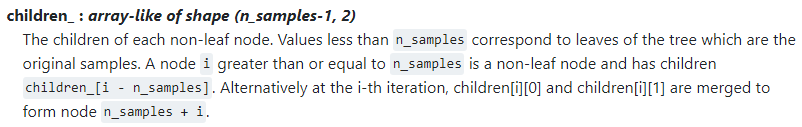

So, say a leaf node (one of the original data points) with index `k` is found on the linkage matrix at row index `r`, then that leaf's parent node index is `r + n_samples`. Let the parent leaf node be `p = r + n_samples` and suppose it is found on the linkage matrix at row index `m`. Then the paren'ts parent node index is `m + n_samples`. We can keep following this logic to build the path index of the node from leaf to trunk. The path index for `k` would look like `[k, r + n_samples, m + n_samples ... ]`.


In [3]:
linkage_matrix = np.load(fname, allow_pickle=True)
linkage_matrix

array([[ 4355,  7799],
       [ 1138,  6078],
       [ 2052,  8967],
       ...,
       [   10, 19995],
       [19974, 19996],
       [    1, 19997]])

In [4]:
n_leaves = linkage_matrix.shape[0] + 1

def get_path_index(node):
    path_index = [node]
    #compute the largest cluster index:
    #the number of leaf nodes minus one (due to index starting at 0)
    #plus the length of the linkage matrix. Turns out linkage matrix is
    #size num leafs - 1, so really its len(linkage_matrix)*2
    largest_cluster = len(linkage_matrix)*2
    while node<largest_cluster:
        #find the row r index where the current node exists. Then r + n_leaves is the parent cluster
        #Append this cluster to the list, and now find the next parent cluster
        #Do this until we've reached the largest cluster
        path_index.append(np.where(linkage_matrix == node)[0][0] + n_leaves)
        node = np.where(linkage_matrix == node)[0][0] + n_leaves  
    path_index.reverse() #reverse this list so that we are starting from the trunk rather than leafs
    return ".".join(str(v) for v in path_index)

In [5]:
get_path_index(0)

'19998.19997.19996.19995.19994.19993.19992.19991.19990.19989.19988.19987.19986.19985.19984.19983.19982.19981.19980.19979.19978.19977.19976.19975.19973.19972.19971.19969.19968.19967.19966.19965.19964.19963.19961.19957.19956.19955.19954.19953.19952.19951.19950.19949.19948.19947.19946.19945.19944.19942.19941.19940.19938.19937.19936.19935.19932.19928.19926.19919.19917.19914.19909.19905.19901.19900.19898.19890.19888.19886.19884.19870.19861.19859.19857.19855.19848.19836.19823.19820.19811.19801.19792.19744.19737.19723.19707.19576.19513.19469.19460.19100.19012.18926.18815.18761.18252.16725.15810.15380.15233.14762.14142.13454.13056.11221.10714.10030.10003.0'

### Create a dataframe of path indexes for each cluster index

In [6]:
labels = list(range(0, n_leaves))
path_index_df = pd.DataFrame({"labels": labels})
path_index_df["path_index"] = path_index_df["labels"].apply(lambda x: get_path_index(x))
path_index_df

,labels,path_index
0,0,19998.19997.19996.19995.19994.19993.19992.1999...
1,1,19998.1
2,2,19998.19997.19996.19995.19994.19993.19992.1999...
3,3,19998.19997.19996.19995.19994.19993.19992.1999...
4,4,19998.19997.19974.4
...,...,...
9995,9995,19998.19997.19996.19995.19994.19993.19992.1999...
9996,9996,19998.19997.19996.19995.19994.19993.19992.1999...
9997,9997,19998.19997.19996.19995.19994.19993.19992.1999...
9998,9998,19998.19997.19996.19995.19994.19993.19992.1999...


### Join the dataframe to the labeled food products

In [7]:
labeled_food_df = pd.read_csv(data_p + "nutrients_pca_kmeans_labeled.csv", index_col=0)
labeled_food_df

,fdc_id,labels
0,344604,2027
1,344605,2027
2,344606,7759
3,344607,7759
4,344608,4424
...,...,...
1590696,2340755,5816
1590697,2340756,5816
1590698,2340757,5816
1590699,2340758,5816


In [8]:
labeled_food_df = labeled_food_df.merge(path_index_df, left_on = "labels", right_on = "labels", how = "inner")
labeled_food_df.rename(columns = {"labels": "cluster_labels"}, inplace = True)
labeled_food_df

,fdc_id,cluster_labels,path_index
0,344604,2027,19998.19997.19996.19995.19994.19993.19992.1999...
1,344605,2027,19998.19997.19996.19995.19994.19993.19992.1999...
2,345349,2027,19998.19997.19996.19995.19994.19993.19992.1999...
3,345350,2027,19998.19997.19996.19995.19994.19993.19992.1999...
4,345534,2027,19998.19997.19996.19995.19994.19993.19992.1999...
...,...,...,...
1590696,2317258,33,19998.19997.19996.19995.33
1590697,2331009,487,19998.19997.19996.19995.19994.19993.19992.1999...
1590698,2336007,487,19998.19997.19996.19995.19994.19993.19992.1999...
1590699,2331336,3568,19998.19997.19996.19995.19994.19993.19992.1999...


In [9]:
labeled_food_df.to_csv(data_p + "usda_2022_nutrient_path_index.csv.gz",  index = False, compression = "gzip")